# Random Forest Regressor for Web3 Wallet Credit Scores

This notebook demonstrates how to perform hyperparameter tuning on a Random Forest Regressor using RandomizedSearchCV, evaluate the model, analyze feature importance, and save the tuned model for later use.

In [2]:
# --- Import Libraries ---
import pandas as pd
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are shown within the notebook
%matplotlib inline

## Step 1: Load and Prepare Data

Load the CSV file `macro_credit_scores.csv`, drop the unused columns, define the features and target, and split the data into training and testing sets.

In [3]:
# --- Step 1: Load and Prepare Data ---
df = pd.read_csv('dataset/macro_credit_scores.csv')

# Drop Unused Columns if they exist
df = df.drop(columns=['Cluster', 'FICO Range'], errors='ignore')

# Define features and target
X = df.drop(columns=['Credit Score'])  # Features
y = df['Credit Score']  # Target

# Save feature names for later reference
feature_names = X.columns.tolist()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

## Step 2: Define Hyperparameter Grid

Define the hyperparameter grid for the Random Forest model. RandomizedSearchCV will explore these parameter combinations to find the best model configuration.

In [4]:
# --- Step 2: Define Hyperparameter Grid ---
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}

## Step 3: Hyperparameter Tuning with RandomizedSearchCV

Initialize and run RandomizedSearchCV with 5-fold cross-validation to find the best hyperparameters for the Random Forest model. The best parameters are printed, and the best model is saved for further evaluation.

In [5]:
# --- Step 3: Initialize and Run RandomizedSearchCV ---
print("\n--- Hyperparameter Tuning with RandomizedSearchCV for Random Forest ---")
rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of different combinations to try
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("\n[INFO] Best Hyperparameters for Random Forest:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_


--- Hyperparameter Tuning with RandomizedSearchCV for Random Forest ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

[INFO] Best Hyperparameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


## Step 4: Model Training and Evaluation

Train the best Random Forest model on the training set, make predictions on the test set, and evaluate the model using R2 Score and Mean Squared Error (MSE).

In [6]:
# --- Step 4: Model Training and Evaluation ---
print("\n--- Training Best Random Forest Model ---")
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate model performance
print("\n--- Model Evaluation ---")
print("Random Forest - R2 Score:", r2_score(y_test, y_pred))
print("Random Forest - MSE:", mean_squared_error(y_test, y_pred))


--- Training Best Random Forest Model ---

--- Model Evaluation ---
Random Forest - R2 Score: 0.9861261371040212
Random Forest - MSE: 0.0009610619507038152


## Step 5: Feature Importance Analysis

Extract and visualize the feature importances from the best Random Forest model. This helps to identify which features are most influential in predicting the target.


--- Feature Importance Analysis ---


C:\Users\user\AppData\Local\Temp\ipykernel_25876\3554183410.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


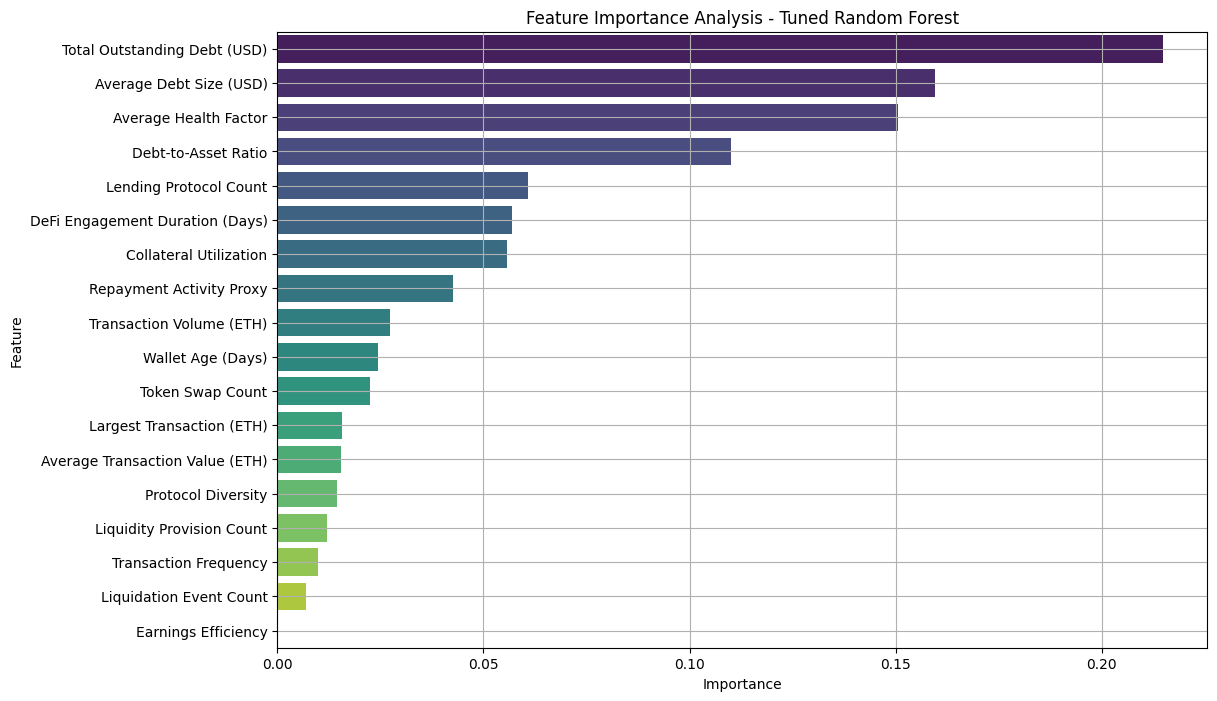

In [7]:
# --- Step 5: Feature Importance Analysis ---
print("\n--- Feature Importance Analysis ---")
feature_importance = best_rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance Analysis - Tuned Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

## Step 6: Save Best Model

Finally, save the best tuned Random Forest model to disk using `joblib` so that it can be easily loaded later for predictions.

In [8]:
# --- Step 6: Save Best Model ---
# --- Step 6: Save Best Model ---
# Create the models directory if it doesn't exist
if not os.path.exists("models"):
    os.makedirs("models")

joblib.dump(best_rf_model, 'models/random_forest_credit_score_model.pkl')
print("[INFO] Random Forest Model saved as 'random_forest_credit_score_model.pkl'")

[INFO] Random Forest Model saved as 'random_forest_credit_score_model.pkl'
